<a href="https://colab.research.google.com/github/arnaldorosentino/ExerciciosMBA_Parte2/blob/main/IntroPandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Biblioteca Pandas

Tratamento e manipulação de dados em Python

https://pandas.pydata.org/pandas-docs/stable/

In [1]:
import numpy as np


In [2]:
# Gerando 5 valores aleatórios entre 0 e 10 seguindo uma distribuição uniforme
x = np.random.uniform(0, 10, 5)
x

array([3.77128175, 5.17546406, 7.631691  , 2.80068502, 3.00769464])

In [3]:
x = np.random.uniform(0, 10, 21).reshape(7,3)
x

array([[1.77595718, 7.50413617, 0.70361926],
       [2.98925248, 1.46005973, 3.90577808],
       [4.27258248, 9.15825259, 0.11482229],
       [0.31338029, 2.13835974, 9.94043896],
       [2.13719038, 8.17711309, 5.67948366],
       [7.86121321, 2.01614904, 5.0293216 ],
       [4.09051027, 6.06180087, 8.90360103]])

In [4]:
import pandas as pd

In [5]:
# DataFrame -> Conjunto de Dados

nomes = ['Arnaldo', 'Bruno', 'Carla', 'Daniel', 'Emily', 'Fabio','Glória']
provas = ['P1', 'P2','P3']

notas = pd.DataFrame(x, index = nomes, columns = provas).round(1)
notas

,P1,P2,P3
Arnaldo,1.8,7.5,0.7
Bruno,3.0,1.5,3.9
Carla,4.3,9.2,0.1
Daniel,0.3,2.1,9.9
Emily,2.1,8.2,5.7
Fabio,7.9,2.0,5.0
Glória,4.1,6.1,8.9


In [6]:
type(notas)

pandas.core.frame.DataFrame

In [7]:
notas.transpose()

,Arnaldo,Bruno,Carla,Daniel,Emily,Fabio,Glória
P1,1.8,3.0,4.3,0.3,2.1,7.9,4.1
P2,7.5,1.5,9.2,2.1,8.2,2.0,6.1
P3,0.7,3.9,0.1,9.9,5.7,5.0,8.9


In [8]:
notas.T

,Arnaldo,Bruno,Carla,Daniel,Emily,Fabio,Glória
P1,1.8,3.0,4.3,0.3,2.1,7.9,4.1
P2,7.5,1.5,9.2,2.1,8.2,2.0,6.1
P3,0.7,3.9,0.1,9.9,5.7,5.0,8.9


In [9]:
notas.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7 entries, Arnaldo to Glória
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   P1      7 non-null      float64
 1   P2      7 non-null      float64
 2   P3      7 non-null      float64
dtypes: float64(3)
memory usage: 524.0+ bytes


In [10]:
notas.describe()

,P1,P2,P3
count,7.000000,7.000000,7.000000
mean,3.357143,5.228571,4.885714
std,2.434377,3.282131,3.726673
min,0.300000,1.500000,0.100000
25%,1.950000,2.050000,2.300000
50%,3.000000,6.100000,5.000000
75%,4.200000,7.850000,7.300000
max,7.900000,9.200000,9.900000


In [11]:
notas.head(3)

,P1,P2,P3
Arnaldo,1.8,7.5,0.7
Bruno,3.0,1.5,3.9
Carla,4.3,9.2,0.1


In [12]:
notas.tail(3)

,P1,P2,P3
Emily,2.1,8.2,5.7
Fabio,7.9,2.0,5.0
Glória,4.1,6.1,8.9


In [13]:
notas.sample(3)

,P1,P2,P3
Emily,2.1,8.2,5.7
Bruno,3.0,1.5,3.9
Daniel,0.3,2.1,9.9


In [14]:
notas.mean(axis=1).round(1)

Arnaldo    3.3
Bruno      2.8
Carla      4.5
Daniel     4.1
Emily      5.3
Fabio      5.0
Glória     6.4
dtype: float64

In [15]:
# Arrendondamenro para o maior valor inteiro

np.ceil(notas.mean(axis=1))

Arnaldo    4.0
Bruno      3.0
Carla      5.0
Daniel     5.0
Emily      6.0
Fabio      5.0
Glória     7.0
dtype: float64

In [16]:
mf = np.ceil(10*notas.mean(axis=1))/10

# adicionar a coluna de media final no conjunto de dados

notas['MF'] = mf
notas

,P1,P2,P3,MF
Arnaldo,1.8,7.5,0.7,3.4
Bruno,3.0,1.5,3.9,2.9
Carla,4.3,9.2,0.1,4.6
Daniel,0.3,2.1,9.9,4.2
Emily,2.1,8.2,5.7,5.4
Fabio,7.9,2.0,5.0,5.0
Glória,4.1,6.1,8.9,6.4


In [17]:
# O aluno é considerado aprovado quando sua nota MF >= 6

# ** MUITO ÚTIL!!!! ***

def auxiliar(nota):
  if nota >=6:
    saida = 'Aprovado'
  else:
    saida = 'Reprovado'
  return saida

notas['Situação'] = notas['MF'].apply(auxiliar)
notas

,P1,P2,P3,MF,Situação
Arnaldo,1.8,7.5,0.7,3.4,Reprovado
Bruno,3.0,1.5,3.9,2.9,Reprovado
Carla,4.3,9.2,0.1,4.6,Reprovado
Daniel,0.3,2.1,9.9,4.2,Reprovado
Emily,2.1,8.2,5.7,5.4,Reprovado
Fabio,7.9,2.0,5.0,5.0,Reprovado
Glória,4.1,6.1,8.9,6.4,Aprovado


In [18]:
# Ordenando os valores da MF de forma decrescente (ascending = False)

notas.sort_values(by = 'MF', ascending = False)

,P1,P2,P3,MF,Situação
Glória,4.1,6.1,8.9,6.4,Aprovado
Emily,2.1,8.2,5.7,5.4,Reprovado
Fabio,7.9,2.0,5.0,5.0,Reprovado
Carla,4.3,9.2,0.1,4.6,Reprovado
Daniel,0.3,2.1,9.9,4.2,Reprovado
Arnaldo,1.8,7.5,0.7,3.4,Reprovado
Bruno,3.0,1.5,3.9,2.9,Reprovado


In [19]:
# Implementa a ordenação e implmenta a modificação no objeto (inplace = True)

notas.sort_values(by = 'MF', ascending = False, inplace = True)
notas

,P1,P2,P3,MF,Situação
Glória,4.1,6.1,8.9,6.4,Aprovado
Emily,2.1,8.2,5.7,5.4,Reprovado
Fabio,7.9,2.0,5.0,5.0,Reprovado
Carla,4.3,9.2,0.1,4.6,Reprovado
Daniel,0.3,2.1,9.9,4.2,Reprovado
Arnaldo,1.8,7.5,0.7,3.4,Reprovado
Bruno,3.0,1.5,3.9,2.9,Reprovado


In [20]:
notas.index

Index(['Glória', 'Emily', 'Fabio', 'Carla', 'Daniel', 'Arnaldo', 'Bruno'], dtype='object')

In [21]:
# Retirar parâmetros de LINHAS sem modificar o objeto original -> drop

notas.drop(['Arnaldo', 'Fabio'])

,P1,P2,P3,MF,Situação
Glória,4.1,6.1,8.9,6.4,Aprovado
Emily,2.1,8.2,5.7,5.4,Reprovado
Carla,4.3,9.2,0.1,4.6,Reprovado
Daniel,0.3,2.1,9.9,4.2,Reprovado
Bruno,3.0,1.5,3.9,2.9,Reprovado


In [22]:
# Para retirar parâmetros que econtram-se nas colunas: Inserir na função drop "axis = 1"

notas.drop(['P1', 'Situação'], axis = 1)

,P2,P3,MF
Glória,6.1,8.9,6.4
Emily,8.2,5.7,5.4
Fabio,2.0,5.0,5.0
Carla,9.2,0.1,4.6
Daniel,2.1,9.9,4.2
Arnaldo,7.5,0.7,3.4
Bruno,1.5,3.9,2.9


In [23]:
# Retirar coluna modificando o objeto original

notas_divulgação = notas.drop(provas, axis = 1)
notas_divulgação

,MF,Situação
Glória,6.4,Aprovado
Emily,5.4,Reprovado
Fabio,5.0,Reprovado
Carla,4.6,Reprovado
Daniel,4.2,Reprovado
Arnaldo,3.4,Reprovado
Bruno,2.9,Reprovado


In [24]:
# Retirar coluna modificando o objeto original

notas_provas = notas.drop(['MF', 'Situação'], axis =1)
notas_provas

,P1,P2,P3
Glória,4.1,6.1,8.9
Emily,2.1,8.2,5.7
Fabio,7.9,2.0,5.0
Carla,4.3,9.2,0.1
Daniel,0.3,2.1,9.9
Arnaldo,1.8,7.5,0.7
Bruno,3.0,1.5,3.9


In [25]:
notas

,P1,P2,P3,MF,Situação
Glória,4.1,6.1,8.9,6.4,Aprovado
Emily,2.1,8.2,5.7,5.4,Reprovado
Fabio,7.9,2.0,5.0,5.0,Reprovado
Carla,4.3,9.2,0.1,4.6,Reprovado
Daniel,0.3,2.1,9.9,4.2,Reprovado
Arnaldo,1.8,7.5,0.7,3.4,Reprovado
Bruno,3.0,1.5,3.9,2.9,Reprovado


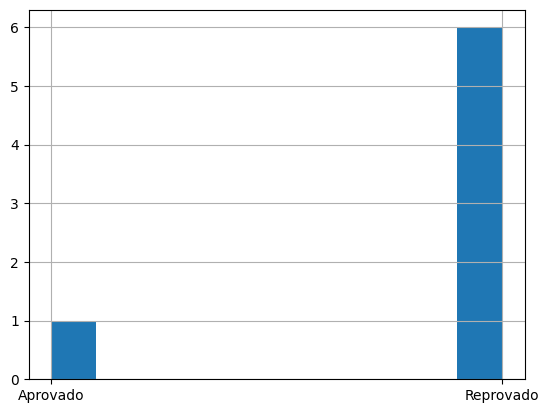

In [33]:
notas.Situação.hist();

# Exercício Proposto

Crie um conjunto com 1000 nomes e 3 variáveis geradas aleatoriamente:

- nomes: use a biblioteca names para gerar nomes aleatórios
- renda_anual: 50000 + 10000*u, onde "u" é gerado aleatoriamente de uma distribuição normal padrão;
- conclusao: u, onde "u" é gerado de uma distribuição uniforme em (0,1)

Agora, acrescente ao conjunto de dados uma variável que represente:

- renda por mês
- faixa de conclusão: (0 - 0,25: baixa; 0,25 - 0,50: média; 0,50 - 0,75: alta; 0,75 - 1: excelente)
- tamanho_do_nome: (pequeno: se o nome tem até 14 caracteres; grande: se tem mais que 15 caracteres)

Entregue o conjunto de dados ordenado pelo tamanho_do_nome

In [26]:
# Variável names -> Necessário installar no Collab:

!pip install names

     -------------------------------------- 789.1/789.1 kB 2.9 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
Using legacy 'setup.py install' for names, since package 'wheel' is not installed.
  Running setup.py install for names: started
  Running setup.py install for names: finished with status 'done'


In [27]:
import names

In [28]:
# Criando um nome aleatório
names.get_full_name()

'Erin House'

In [29]:
# Extraindo apenas o primeiro nome aleatório
names.get_first_name()

'Henry'

In [30]:
# Extraindo apenas o primeiro nome aleatório de um determinado sexo (female ou male)
names.get_first_name(gender = 'female')

'Lea'

In [31]:
# Criando uma lista de "5" nomes aleatórios
[names.get_full_name() for i in range(5)]

['Patsy Beals', 'Erica Jones', 'Susan Moore', 'Rose Mason', 'Willie Abrams']

In [32]:
# Atividade

import names
import scipy.stats as ss
import numpy as np
import pandas as pd

reps = 1000
meses = 12

nomes = [names.get_full_name() for i in range(reps)]
renda = [((50000 + 10000*ss.norm.rvs())/meses) for i in range(reps*meses)]
conclusao = [ss.uniform.rvs() for i in range(reps)]

ModuleNotFoundError: No module named 'scipy'

In [ ]:
renda_mes = np.array(renda).reshape(reps,12)
tamanho_do_nome = [len(nomes[i]) for i in range(reps)]

Mes = ['Jan', 'Fev', 'Mar', 'Abr', 'Maio', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez' ]

rendas = pd.DataFrame(renda_mes, index = nomes, columns = Mes).round(1)

rendas['Conclusão'] = conclusao
rendas['Tamanho'] = tamanho_do_nome


def auxiliar(faixa):
  if faixa <= 0.25:
    saida = 'baixa'
  if faixa > 0.25 and faixa <= 0.5:
    saida = 'media'
  if faixa > 0.5 and faixa <= 0.75:
    saida = 'alta'
  if faixa > 0.75:
    saida = 'excelente'
  return saida

rendas['Faixa de Conclusão'] = rendas['Conclusão'].apply(auxiliar)

def auxiliar2(tamanho):
  if tamanho < 15:
    saida2 = 'pequeno'
  else:
    saida2 = 'grande'
  return saida2

rendas['Tamanho do Nome'] = rendas['Tamanho'].apply(auxiliar2)



rendas.sort_values(by = 'Tamanho', ascending = False, inplace = True)
dados = rendas.head(10)
dados